In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
data = load_digits()

In [14]:
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
data.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<Figure size 432x288 with 0 Axes>

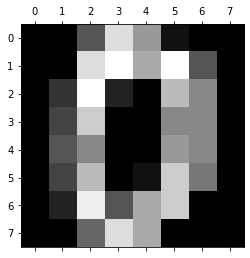

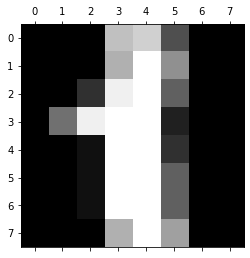

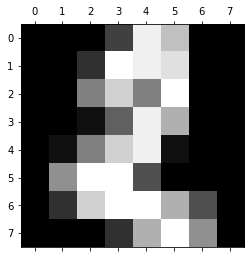

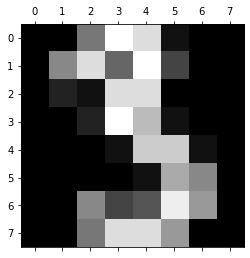

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.gray()
for i in range(4):
    plt.matshow(data.images[i])

In [9]:
df = pd.DataFrame(data.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
df['target'] = data.target

In [11]:
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [15]:
X = df.drop(['target'],axis=1)

In [16]:
y = df.target

In [17]:
X.shape

(1797, 64)

In [18]:
y.shape

(1797,)

## Train test and split data

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## Feature scaling

In [43]:
# from sklearn.preprocessing import StandardScaler    
# sc= StandardScaler()    
# X_train= sc.fit_transform(X_train)    
# X_test= sc.transform(X_test)    

## model training now RandomForestClassifier

In [44]:
from sklearn.ensemble import RandomForestClassifier  
model= RandomForestClassifier(n_estimators= 50)  #mention how much trees you want in your model if more accuracy wil be more
model.fit(X_train, y_train)  

RandomForestClassifier(n_estimators=50)

In [45]:
y_pred = model.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[26,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0, 47,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 35,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  1,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 35]], dtype=int64)

Text(0.5, 42.0, 'predicted')

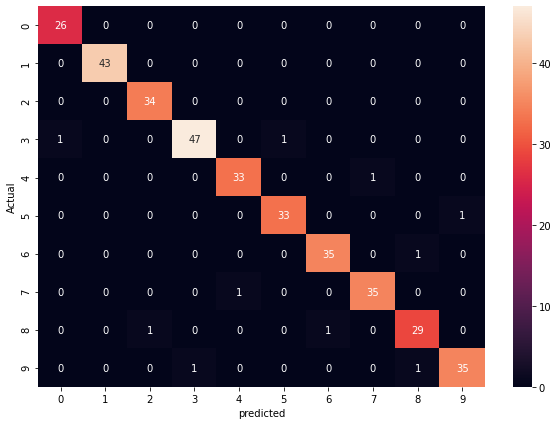

In [47]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.ylabel('Actual')
plt.xlabel('predicted')

In [48]:
model.score(X_test,y_test)

0.9722222222222222

In [38]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [39]:
classifier.score(X_test,y_test)

0.975

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [42]:
model.score(X_test,y_test)

0.9638888888888889

## Now lets get into exercise

In [49]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()


In [54]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [60]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [63]:
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [64]:
X = df.drop(['target'],axis=1)

In [65]:
y = df.target

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [67]:
from sklearn.ensemble import RandomForestClassifier  
model= RandomForestClassifier(n_estimators= 50)  #mention how much trees you want in your model if more accuracy wil be more
model.fit(X_train, y_train)  

RandomForestClassifier(n_estimators=50)

In [75]:
Y_predicted =model.predict(X_test)

In [76]:
 model.score(X_test,y_test)

1.0

In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Y_predicted)
cm

array([[14,  0,  0],
       [ 0,  6,  0],
       [ 0,  0, 10]], dtype=int64)

Text(0.5, 42.0, 'predicted')

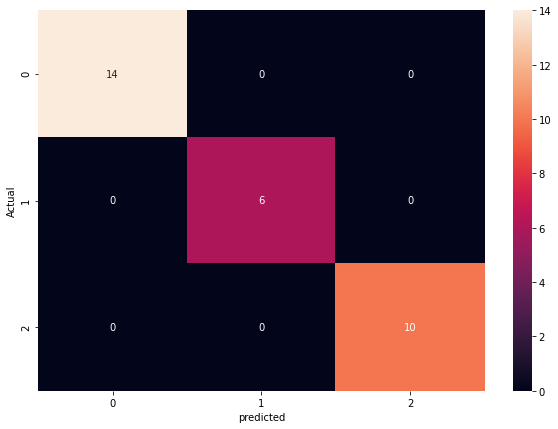

In [78]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.ylabel('Actual')
plt.xlabel('predicted')